In [191]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [162]:
bl = pd.read_csv('bankloans.csv')
bl

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [184]:
loanD = bl.dropna()
loan = loanD.copy()
loan['debtinc'] = loan['debtinc'].round()
loan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.0,11.359392,5.008608,1.0
1,27,1,10,6,31,17.0,1.362202,4.000798,0.0
2,40,1,15,14,55,6.0,0.856075,2.168925,0.0
3,41,1,15,14,120,3.0,2.658720,0.821280,0.0
4,24,2,2,0,28,17.0,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,5.0,0.262062,0.979938,1.0
696,29,2,6,4,21,12.0,0.369495,2.045505,0.0
697,33,1,15,3,32,8.0,0.491264,1.940736,0.0
698,45,1,19,22,77,8.0,2.302608,4.165392,0.0


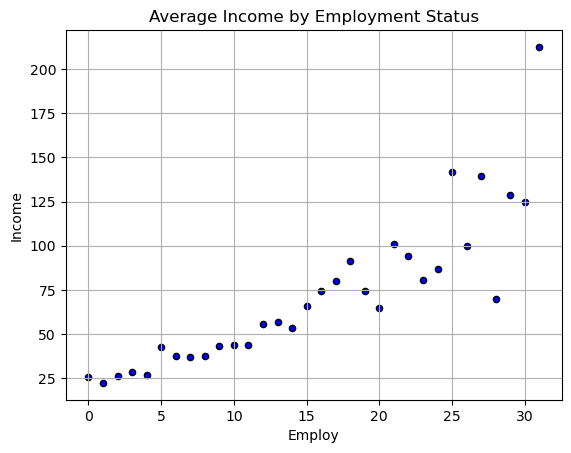

In [185]:
aveIncEmp = loan.groupby('employ')['income'].mean()

aveIncEmp = aveIncEmp.reset_index()

aveIncEmp.plot.scatter(x='employ', y='income', color='blue', marker='o', edgecolors='black')

plt.xlabel('Employ')
plt.ylabel('Income')
plt.title('Average Income by Employment Status')

plt.grid(True)
plt.show()

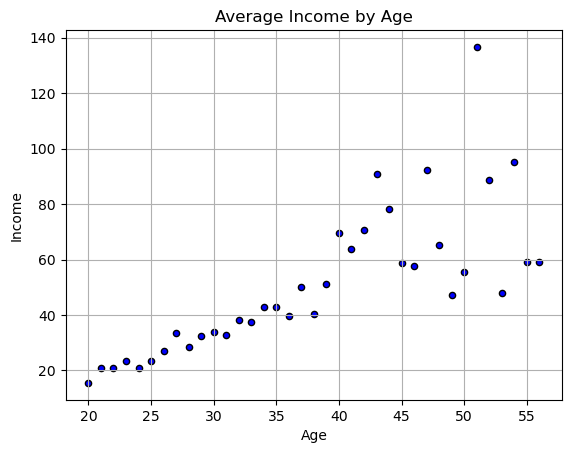

In [186]:
aveIncAge = loan.groupby('age')['income'].mean()

aveIncAge = aveIncAge.reset_index()

aveIncAge.plot.scatter(x='age', y='income', color='blue', marker='o', edgecolors='black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Average Income by Age')

plt.grid(True)
plt.show()

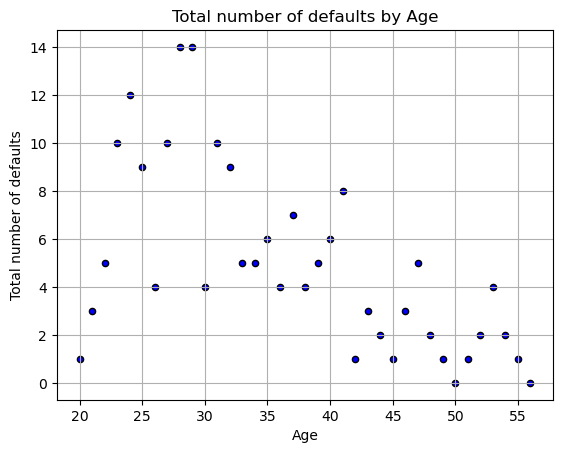

In [187]:
defSumAge = gg.groupby('age')['default'].sum()

defSumAge = defSumAge.reset_index()

defSumAge.plot.scatter(x='age', y='default', color='blue', marker='o', edgecolors='black')

plt.xlabel('Age')
plt.ylabel('Total number of defaults')
plt.title('Total number of defaults by Age')

plt.grid(True)
plt.show()

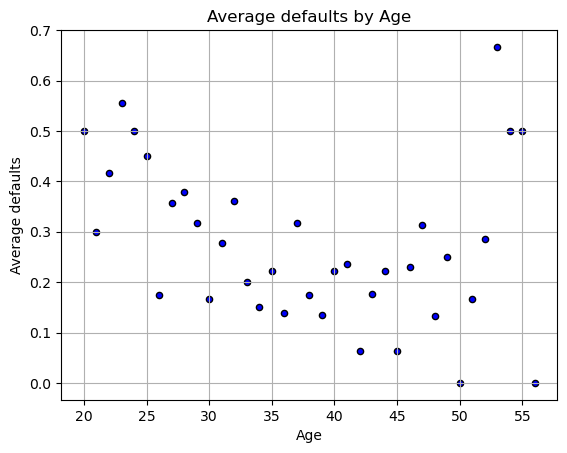

In [188]:
defMeanAge = loan.groupby('age')['default'].mean()

defMeanAge = defMeanAge.reset_index()

defMeanAge.plot.scatter(x='age', y='default', color='blue', marker='o', edgecolors='black')

plt.xlabel('Age')
plt.ylabel('Average defaults')
plt.title('Average defaults by Age')

plt.grid(True)
plt.show()

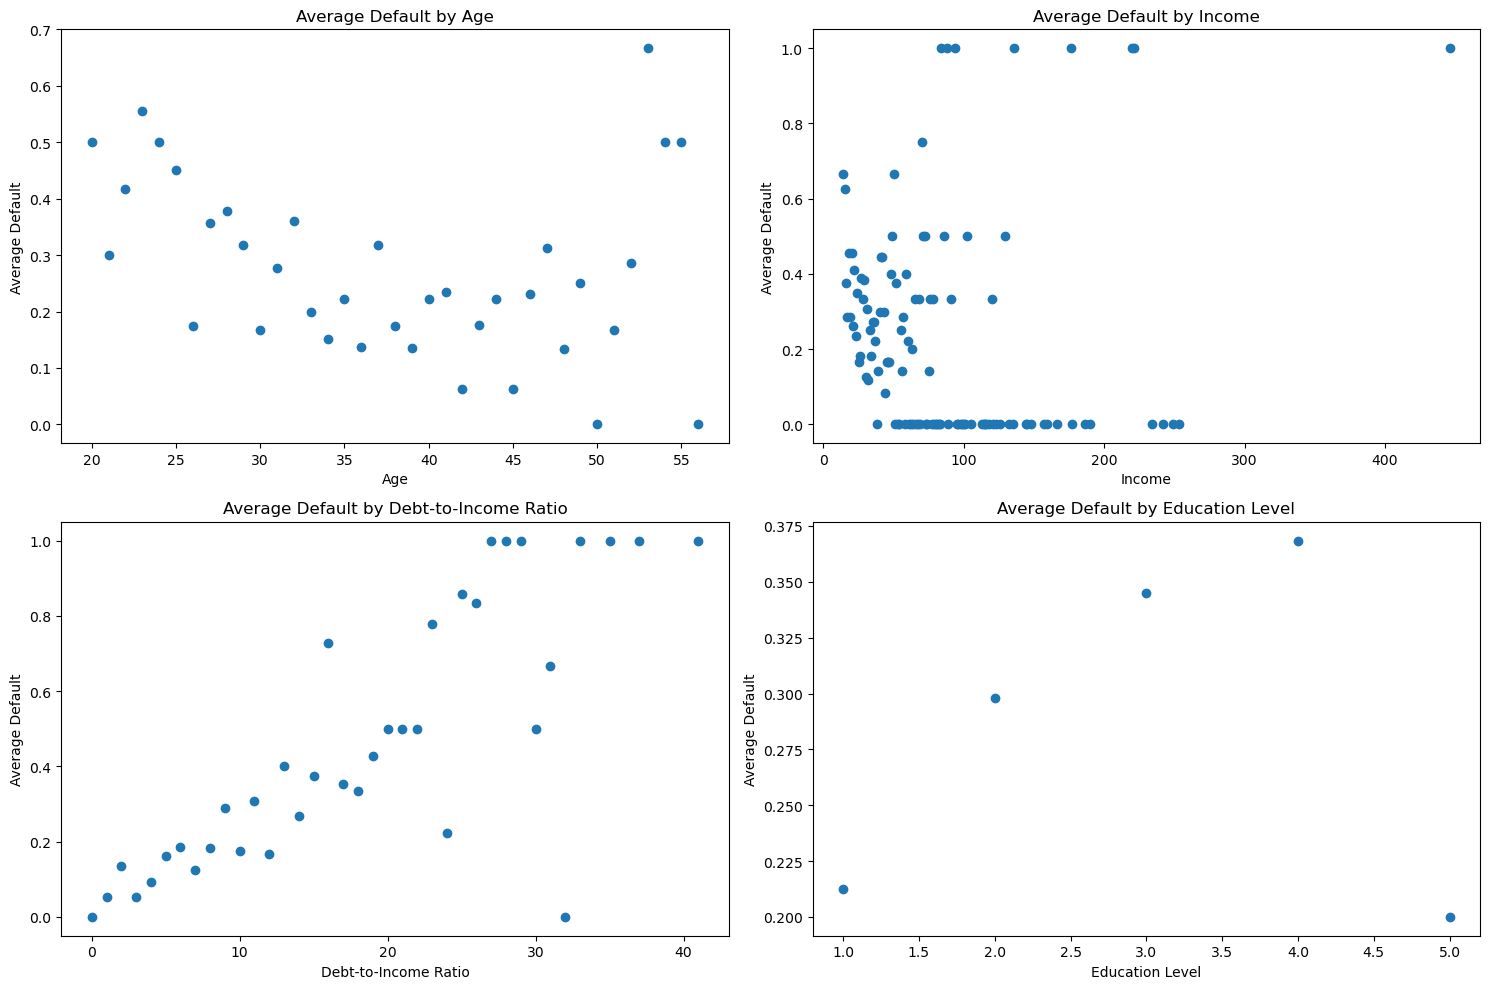

In [198]:

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

ageDef= loan.groupby('age')['default'].mean()

axs[0, 0].scatter(ageDef.index, ageDef.values, marker='o')
axs[0, 0].set_title('Average Default by Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Average Default')

incDef = loan.groupby('income')['default'].mean()

axs[0, 1].scatter(incDef.index, incDef.values, marker='o')
axs[0, 1].set_title('Average Default by Income')
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Average Default')

debtDef = loan.groupby('debtinc')['default'].mean()

axs[1, 0].scatter(debtDef.index, debtDef.values, marker='o')
axs[1, 0].set_title('Average Default by Debt-to-Income Ratio')
axs[1, 0].set_xlabel('Debt-to-Income Ratio')
axs[1, 0].set_ylabel('Average Default')

edDef = loan.groupby('ed')['default'].mean()

axs[1, 1].scatter(edDef.index, edDef.values, marker='o')
axs[1, 1].set_title('Average Default by Education Level')
axs[1, 1].set_xlabel('Education Level')
axs[1, 1].set_ylabel('Average Default')

plt.tight_layout()

plt.show()




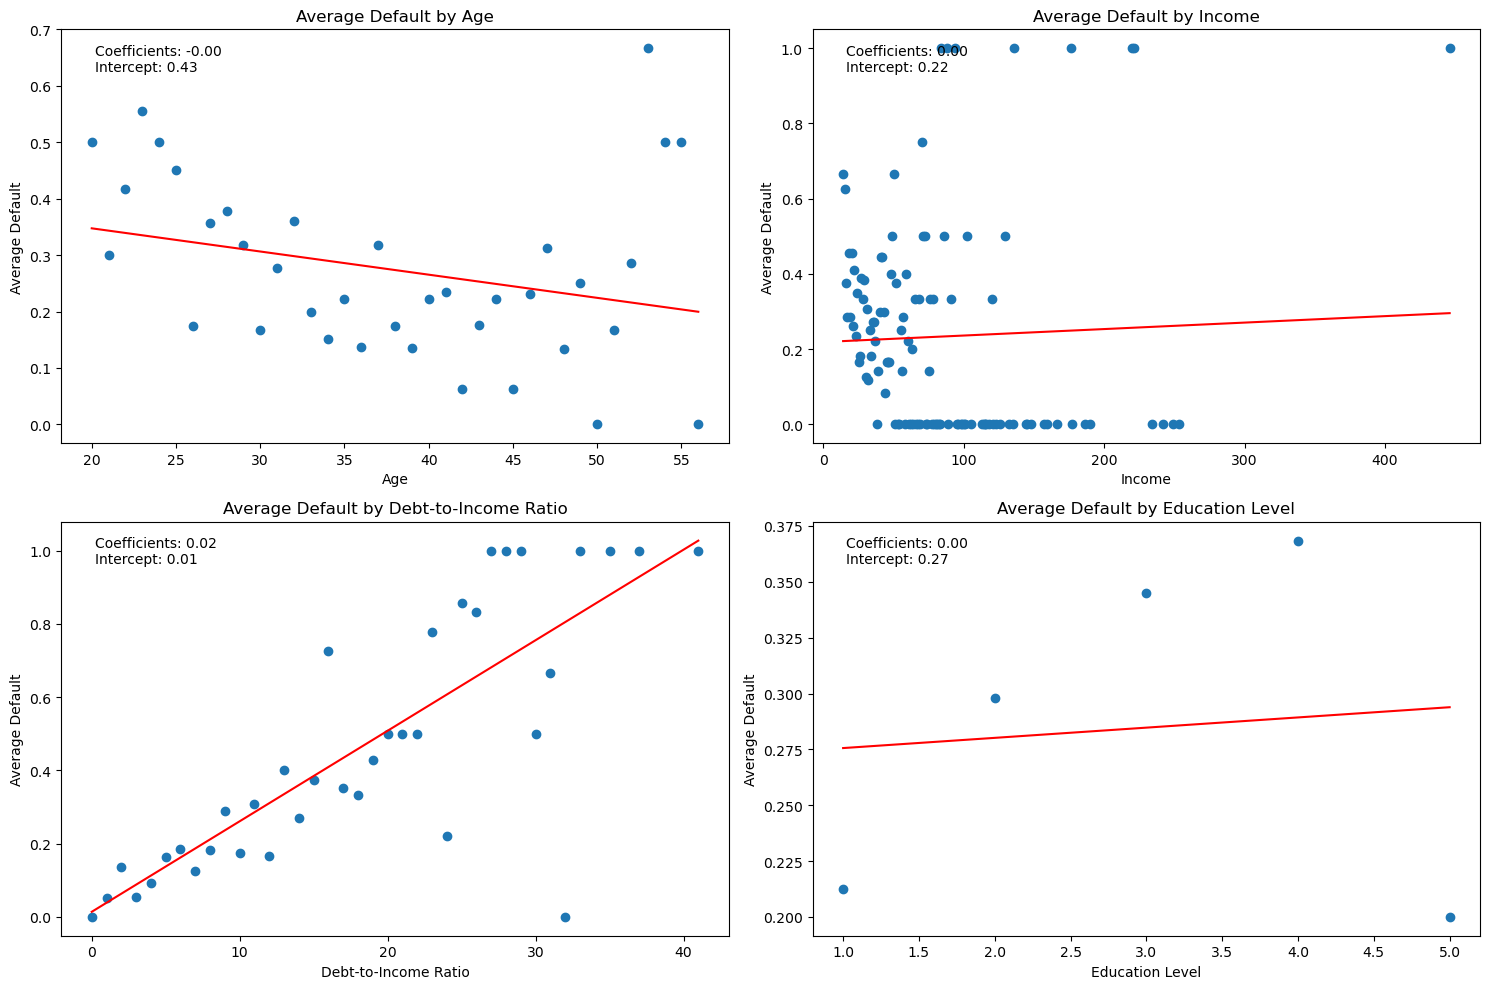

In [199]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

ageDef= loan.groupby('age')['default'].mean()

axs[0, 0].scatter(ageDef.index, ageDef.values, marker='o')
axs[0, 0].set_title('Average Default by Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Average Default')
regAge = LinearRegression().fit(ageDef.index.values.reshape(-1, 1), ageDef.values.reshape(-1, 1))
axs[0, 0].plot(ageDef.index, regAge.predict(ageDef.index.values.reshape(-1, 1)), color='red')
axs[0, 0].text(0.05, 0.9, f'Coefficients: {regAge.coef_[0][0]:.2f}\nIntercept: {regAge.intercept_[0]:.2f}', transform=axs[0, 0].transAxes, fontsize=10)


incDef = loan.groupby('income')['default'].mean()

axs[0, 1].scatter(incDef.index, incDef.values, marker='o')
axs[0, 1].set_title('Average Default by Income')
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Average Default')
regInc = LinearRegression().fit(incDef.index.values.reshape(-1, 1), incDef.values.reshape(-1, 1))
axs[0, 1].plot(incDef.index, regInc.predict(incDef.index.values.reshape(-1, 1)), color='red')
axs[0, 1].text(0.05, 0.9, f'Coefficients: {regInc.coef_[0][0]:.2f}\nIntercept: {regInc.intercept_[0]:.2f}', transform=axs[0, 1].transAxes, fontsize=10)


debtDef = loan.groupby('debtinc')['default'].mean()

axs[1, 0].scatter(debtDef.index, debtDef.values, marker='o')
axs[1, 0].set_title('Average Default by Debt-to-Income Ratio')
axs[1, 0].set_xlabel('Debt-to-Income Ratio')
axs[1, 0].set_ylabel('Average Default')
regDebt = LinearRegression().fit(debtDef.index.values.reshape(-1, 1), debtDef.values.reshape(-1, 1))
axs[1, 0].plot(debtDef.index, regDebt.predict(debtDef.index.values.reshape(-1, 1)), color='red')
axs[1, 0].text(0.05, 0.9, f'Coefficients: {regDebt.coef_[0][0]:.2f}\nIntercept: {regDebt.intercept_[0]:.2f}', transform=axs[1, 0].transAxes, fontsize=10)


edDef = loan.groupby('ed')['default'].mean()

axs[1, 1].scatter(edDef.index, edDef.values, marker='o')
axs[1, 1].set_title('Average Default by Education Level')
axs[1, 1].set_xlabel('Education Level')
axs[1, 1].set_ylabel('Average Default')
regEd = LinearRegression().fit(edDef.index.values.reshape(-1, 1), edDef.values.reshape(-1, 1))
axs[1, 1].plot(edDef.index, regEd.predict(edDef.index.values.reshape(-1, 1)), color='red')
axs[1, 1].text(0.05, 0.9, f'Coefficients: {regEd.coef_[0][0]:.2f}\nIntercept: {regEd.intercept_[0]:.2f}', transform=axs[1, 1].transAxes, fontsize=10)


plt.tight_layout()
plt.show()


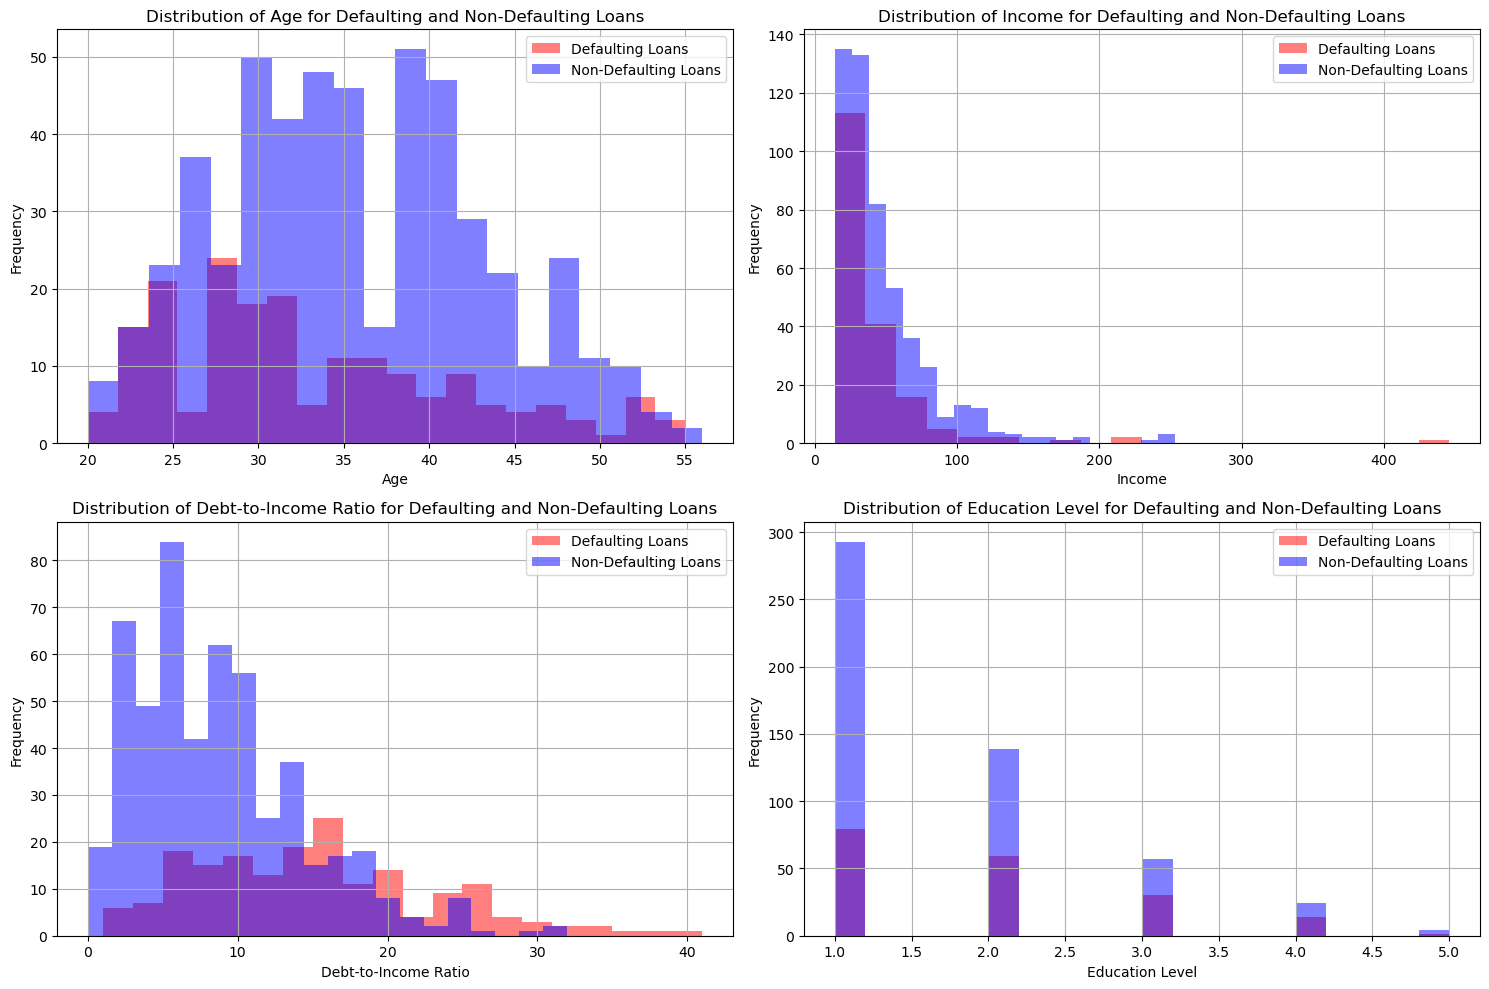

In [201]:
defLoans = loan[loan['default'] == 1]
nonDefLoans = loan[loan['default'] == 0]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].hist(defLoans['age'], bins=20, color='red', alpha=0.5, label='Defaulting Loans')
axs[0, 0].hist(nonDefLoans['age'], bins=20, color='blue', alpha=0.5, label='Non-Defaulting Loans')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Age for Defaulting and Non-Defaulting Loans')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].hist(defLoans['income'], bins=20, color='red', alpha=0.5, label='Defaulting Loans')
axs[0, 1].hist(nonDefLoans['income'], bins=20, color='blue', alpha=0.5, label='Non-Defaulting Loans')
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Income for Defaulting and Non-Defaulting Loans')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].hist(defLoans['debtinc'], bins=20, color='red', alpha=0.5, label='Defaulting Loans')
axs[1, 0].hist(nonDefLoans['debtinc'], bins=20, color='blue', alpha=0.5, label='Non-Defaulting Loans')
axs[1, 0].set_xlabel('Debt-to-Income Ratio')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Debt-to-Income Ratio for Defaulting and Non-Defaulting Loans')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].hist(defLoans['ed'], bins=20, color='red', alpha=0.5, label='Defaulting Loans')
axs[1, 1].hist(nonDefLoans['ed'], bins=20, color='blue', alpha=0.5, label='Non-Defaulting Loans')
axs[1, 1].set_xlabel('Education Level')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Education Level for Defaulting and Non-Defaulting Loans')
axs[1, 1].legend()
axs[1, 1].grid(True)


plt.tight_layout()
plt.show()




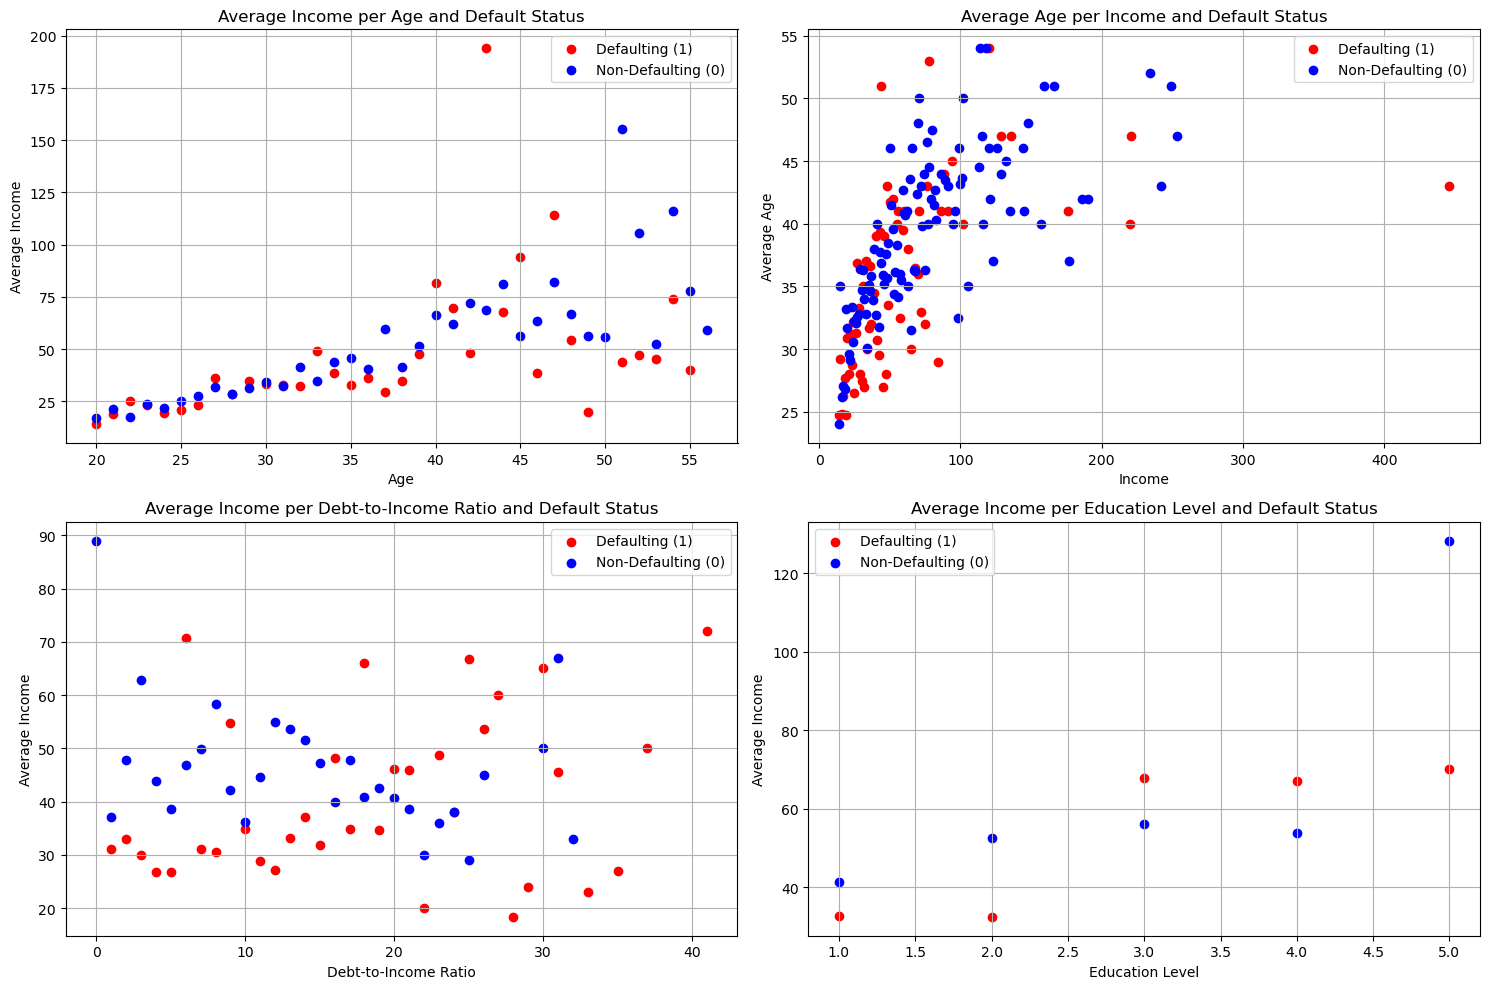

In [203]:

aveIncDef1_age = loan[loan['default'] == 1].groupby('age')['income'].mean().reset_index()
aveIncDef0_age = loan[loan['default'] == 0].groupby('age')['income'].mean().reset_index()


aveIncDef1_income = loan[loan['default'] == 1].groupby('income')['age'].mean().reset_index()
aveIncDef0_income = loan[loan['default'] == 0].groupby('income')['age'].mean().reset_index()


aveIncDef1_debtinc = loan[loan['default'] == 1].groupby('debtinc')['income'].mean().reset_index()
aveIncDef0_debtinc = loan[loan['default'] == 0].groupby('debtinc')['income'].mean().reset_index()

aveIncDef1_ed = loan[loan['default'] == 1].groupby('ed')['income'].mean().reset_index()
aveIncDef0_ed = loan[loan['default'] == 0].groupby('ed')['income'].mean().reset_index()


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].scatter(aveIncDef1_age['age'], aveIncDef1_age['income'], color='red', label='Defaulting (1)')
axs[0, 0].scatter(aveIncDef0_age['age'], aveIncDef0_age['income'], color='blue', label='Non-Defaulting (0)')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Average Income')
axs[0, 0].set_title('Average Income per Age and Default Status')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].scatter(aveIncDef1_income['income'], aveIncDef1_income['age'], color='red', label='Defaulting (1)')
axs[0, 1].scatter(aveIncDef0_income['income'], aveIncDef0_income['age'], color='blue', label='Non-Defaulting (0)')
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Average Age')
axs[0, 1].set_title('Average Age per Income and Default Status')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].scatter(aveIncDef1_debtinc['debtinc'], aveIncDef1_debtinc['income'], color='red', label='Defaulting (1)')
axs[1, 0].scatter(aveIncDef0_debtinc['debtinc'], aveIncDef0_debtinc['income'], color='blue', label='Non-Defaulting (0)')
axs[1, 0].set_xlabel('Debt-to-Income Ratio')
axs[1, 0].set_ylabel('Average Income')
axs[1, 0].set_title('Average Income per Debt-to-Income Ratio and Default Status')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].scatter(aveIncDef1_ed['ed'], aveIncDef1_ed['income'], color='red', label='Defaulting (1)')
axs[1, 1].scatter(aveIncDef0_ed['ed'], aveIncDef0_ed['income'], color='blue', label='Non-Defaulting (0)')
axs[1, 1].set_xlabel('Education Level')
axs[1, 1].set_ylabel('Average Income')
axs[1, 1].set_title('Average Income per Education Level and Default Status')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()



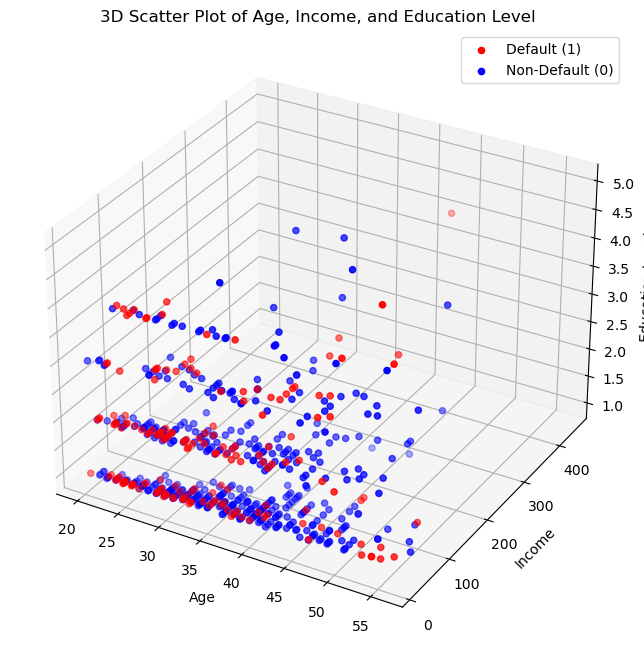

In [205]:

defLoan = loan[loan['default'] == 1]
nonDefLoan = loan[loan['default'] == 0]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(defLoan['age'], defLoan['income'], defLoan['ed'], color='red', label='Default (1)')
ax.scatter(nonDefLoan['age'], nonDefLoan['income'], nonDefLoan['ed'], color='blue', label='Non-Default (0)')


ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Education Level')
ax.set_title('3D Scatter Plot of Age, Income, and Education Level')


plt.legend()
plt.show()


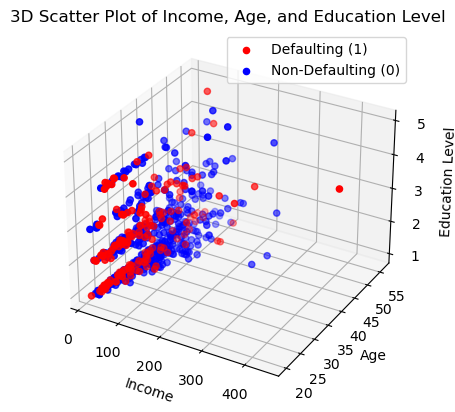

In [211]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

defLoan = loan[loan['default'] == 1]
nonDefLoan = loan[loan['default'] == 0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter3D(defLoan['income'], defLoan['age'], defLoan['ed'], color='red', label='Defaulting (1)')
ax.scatter3D(nonDefLoan['income'], nonDefLoan['age'], nonDefLoan['ed'], color='blue', label='Non-Defaulting (0)')

ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Education Level')
ax.set_title('3D Scatter Plot of Income, Age, and Education Level')


plt.legend()
plt.show()


In [215]:
loanSubset = loan.groupby(['debtinc', 'default']).agg({'income': 'mean'}).reset_index()
loanSubset.columns = ['debtinc','default','aveIncome']
print(loanSubset)

    debtinc  default  aveIncome
0       0.0      0.0  89.000000
1       1.0      0.0  37.166667
2       1.0      1.0  31.000000
3       2.0      0.0  47.718750
4       2.0      1.0  33.000000
..      ...      ...        ...
60     32.0      0.0  33.000000
61     33.0      1.0  23.000000
62     35.0      1.0  27.000000
63     37.0      1.0  50.000000
64     41.0      1.0  72.000000

[65 rows x 3 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


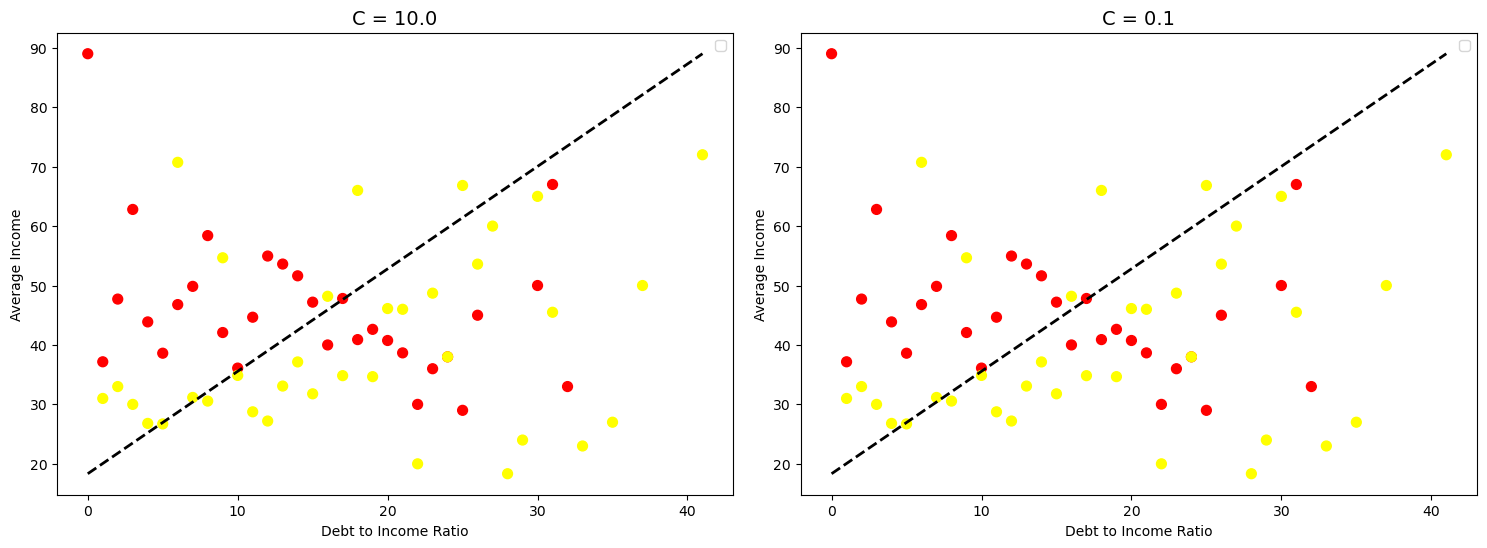

In [218]:

X = loanSubset[['debtinc', 'aveIncome']]
y = loanSubset['default']

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
 
    model = SVC(kernel='linear', C=C).fit(X, y)
    
 
    axi.scatter(X['debtinc'], X['aveIncome'], c=y, s=50, cmap='autumn')
    
    
    axi.plot([X['debtinc'].min(), X['debtinc'].max()], [X['aveIncome'].min(), X['aveIncome'].max()], 'k--', lw=2)
   
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
 
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    

    axi.set_xlabel('Debt to Income Ratio')
    axi.set_ylabel('Average Income')
    axi.legend()

plt.show()


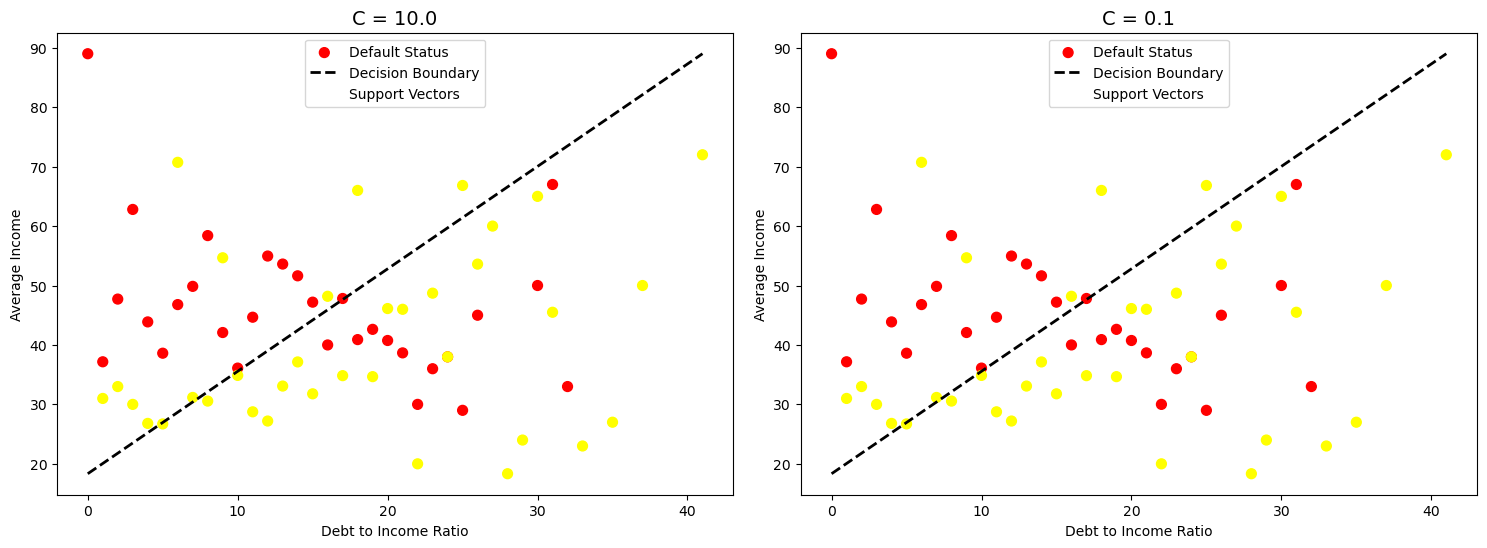

In [220]:

X = loanSubset[['debtinc', 'aveIncome']]
y = loanSubset['default']

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
   
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X['debtinc'], X['aveIncome'], c=y, s=50, cmap='autumn', label='Default Status')
    axi.plot([X['debtinc'].min(), X['debtinc'].max()], [X['aveIncome'].min(), X['aveIncome'].max()], 'k--', lw=2, label='Decision Boundary')
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none', label='Support Vectors')
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    axi.set_xlabel('Debt to Income Ratio')
    axi.set_ylabel('Average Income')
    axi.legend()

plt.show()


In [222]:

income = float(input("Enter your income: "))
debt_to_income_ratio = float(input("Enter your debt-to-income ratio: "))

user_data = pd.DataFrame([[ debt_to_income_ratio, income]], columns=[ 'debtinc','aveIncome'])

prediction = model.predict(user_data)

if prediction == 0:
    print("Congratulations! You are eligible for a loan.")
else:
    print("Sorry, you are not eligible for a loan.")


Enter your income: 50
Enter your debt-to-income ratio: 10
Congratulations! You are eligible for a loan.
